# np.random.choice(X, (N, B), replace=True)
# np.random.choice(X, (B, N), replace=True)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def TrueTriangularDistrubition(x):
    if x < 0:
        return 0
    elif x < 1:
        return x**2 / 2
    elif x < 2:
        return 2*x - x**2 / 2 - 1
    else:
        return 1

In [3]:
size = 100
X = np.random.uniform(0, 1, size=size) + np.random.uniform(0, 1, size=size)

B = 800
N = len(X)
Xb = np.random.choice(X, (B, N), replace=True)
Xb.shape

(800, 100)

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


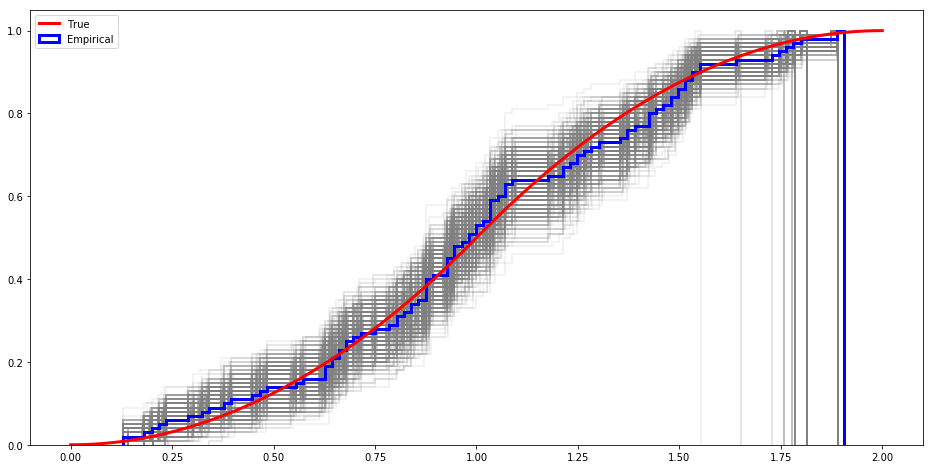

In [4]:
plt.figure(figsize = (16, 8))

for bootstrap_sample in Xb:
    plt.hist(bootstrap_sample, bins=N, normed=1, histtype='step',
             cumulative=True, alpha = 0.1, color='grey', linewidth = 2)

plt.plot(np.linspace(0, 2, 100), 
         list(map(TrueTriangularDistrubition, np.linspace(0, 2, 100))), 
         color = 'red', label='True', linewidth = 3)    

plt.hist(X, bins=N, normed=1, histtype='step',
         cumulative=True, label='Empirical', color='blue', linewidth = 3)

plt.legend()
plt.show()

In [5]:
from scipy.stats import cauchy
from scipy.stats import norm

In [6]:
X_cauchy = cauchy.rvs(size=1000)
X_norm = norm.rvs(size=1000)

B = 5000
N = len(X_cauchy)

cauchy_boots = np.random.choice(X_cauchy, (B, N), replace=True)
norm_boots = np.random.choice(X_norm, (B, N), replace=True)

mean_cauchy_boots = np.mean(cauchy_boots, axis=1)
mean_norm_boots = np.mean(norm_boots, axis=1)

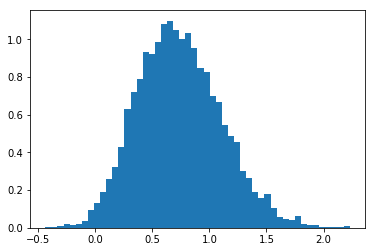

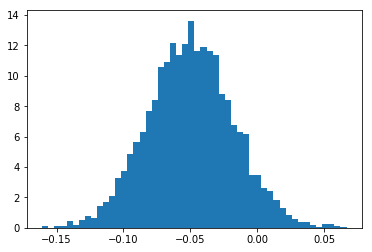

In [7]:
plt.hist(mean_cauchy_boots, bins=50, normed=True)
plt.show()

plt.hist(mean_norm_boots, bins=50, normed=True)
plt.show()

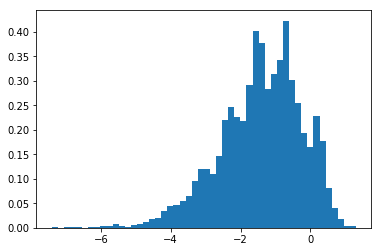

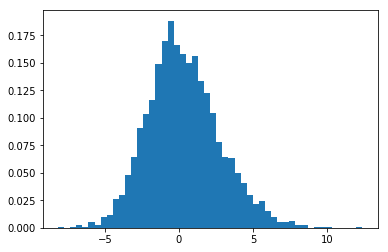

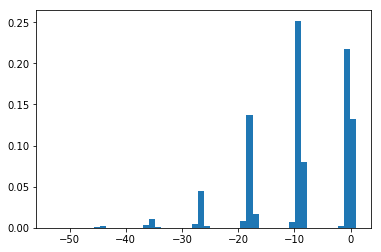

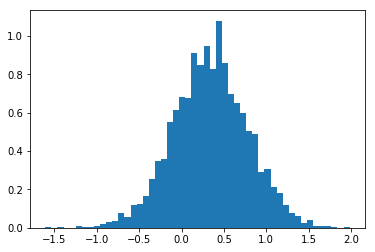

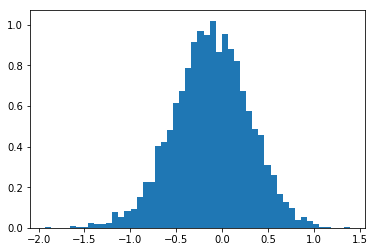

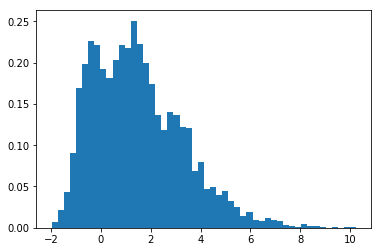

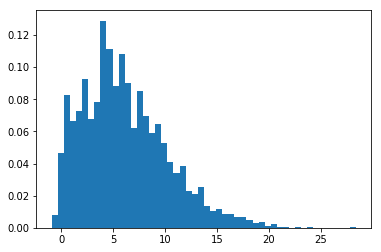

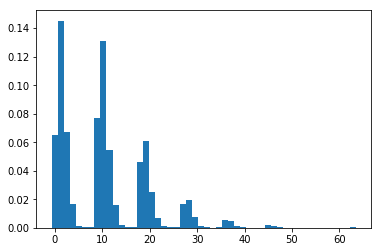

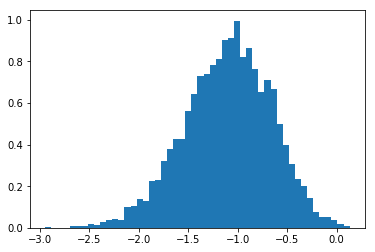

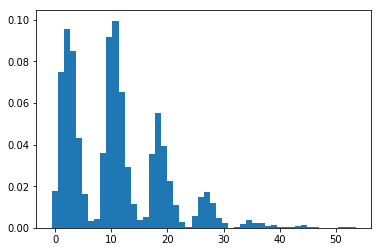

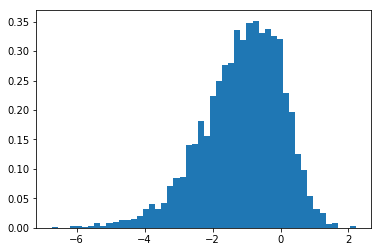

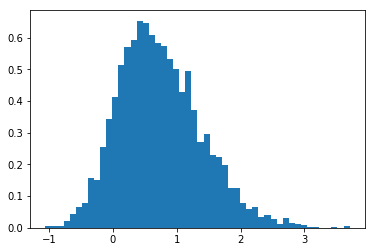

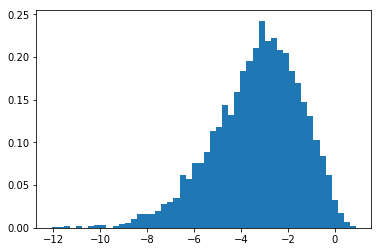

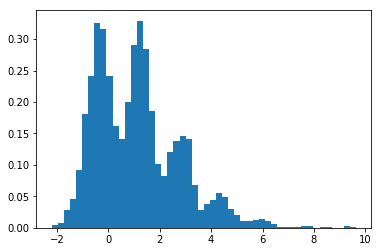

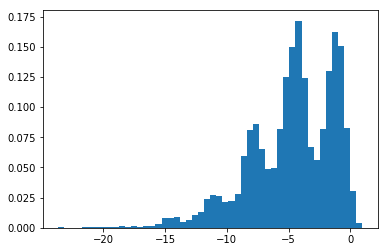

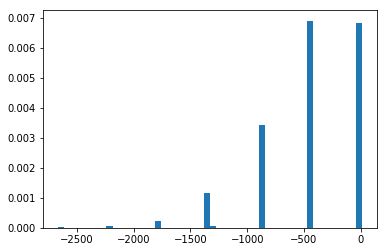

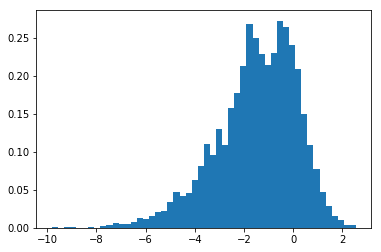

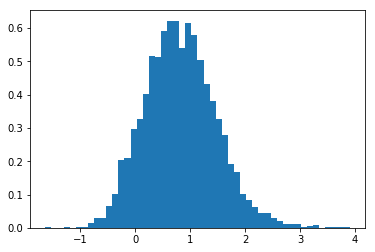

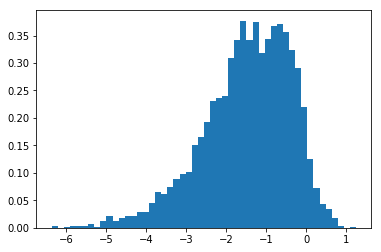

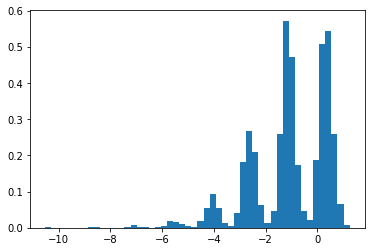

In [8]:
iterations = 20
size = 1000
B = 5000
for i in range(iterations):
    X_cauchy = cauchy.rvs(size=size)
    N = len(X_cauchy)
    cauchy_boots = np.random.choice(X_cauchy, (B, N), replace=True)
    mean_cauchy_boots = np.mean(cauchy_boots, axis=1)    
    plt.hist(mean_cauchy_boots, bins=50, normed=True)
    plt.show()

In [9]:
iterations = 20
std_cauchy = np.zeros(iterations)
std_norm = np.zeros(iterations)
for index in range(iterations):
    X_cauchy = cauchy.rvs(size=1000)
    X_norm = norm.rvs(size=1000)

    B = 5000
    N = len(X_cauchy)
    cauchy_boots = np.random.choice(X_cauchy, (B, N), replace=True)
    norm_boots = np.random.choice(X_norm, (B, N), replace=True)

    mean_cauchy_boots = np.mean(cauchy_boots, axis=1)
    mean_norm_boots = np.mean(norm_boots, axis=1)

    std_cauchy[index] = np.std(mean_cauchy_boots)
    std_norm[index] = np.std(mean_norm_boots)

In [10]:
print(std_cauchy)

[  2.95937566   3.07297127   0.92328813   0.40022878   0.39858915
   1.1489637   14.81304869   0.69478205  10.71393376   1.33281284
 162.29319126   0.65380486  12.76183815   0.57871631   1.07823219
   4.98179885   0.48598697  56.9923131    0.4385208    0.49180473]


In [11]:
print(std_norm)

[0.03130646 0.03214117 0.03113803 0.03086089 0.03123141 0.03204883
 0.03127622 0.03128191 0.03065057 0.03108849 0.0312962  0.03244358
 0.03096741 0.03194431 0.0314414  0.03111377 0.03249192 0.03331614
 0.03166886 0.03153199]


## Bootstrap Example 1.

Рассмотрим такую смесь двух известных распределений: две трети данных идут от экспоненциального распределения с параметром $\lambda = 1$, а оставшая треть -- стандартного нормального. 

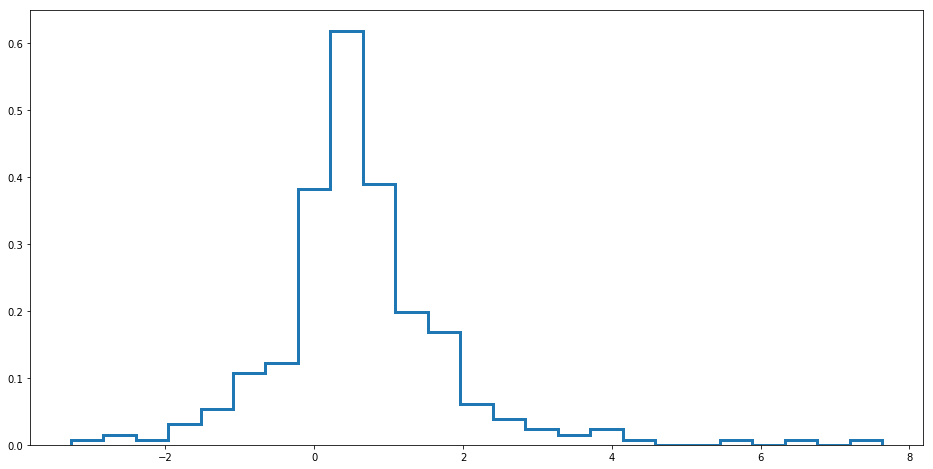

In [12]:
plt.figure(figsize = (16, 8))

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step', linewidth = 3, normed=True);

In [13]:
n = len(x)
B = 10000
xb = np.random.choice(x, (n, B))
mb = xb.mean(axis=0)

In [14]:
mb.mean()

0.6327128158261003

In [15]:
np.percentile(mb, [2.5, 97.5])

array([0.49722872, 0.77159654])

In [16]:
np.mean(x)

0.6331667046142295

## Bootstrap Example 2.

In [17]:
m = np.arange(100).reshape(10, 10)
m

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [18]:
np.cumsum(m, axis=0)

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28],
       [ 30,  33,  36,  39,  42,  45,  48,  51,  54,  57],
       [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96],
       [100, 105, 110, 115, 120, 125, 130, 135, 140, 145],
       [150, 156, 162, 168, 174, 180, 186, 192, 198, 204],
       [210, 217, 224, 231, 238, 245, 252, 259, 266, 273],
       [280, 288, 296, 304, 312, 320, 328, 336, 344, 352],
       [360, 369, 378, 387, 396, 405, 414, 423, 432, 441],
       [450, 460, 470, 480, 490, 500, 510, 520, 530, 540]])

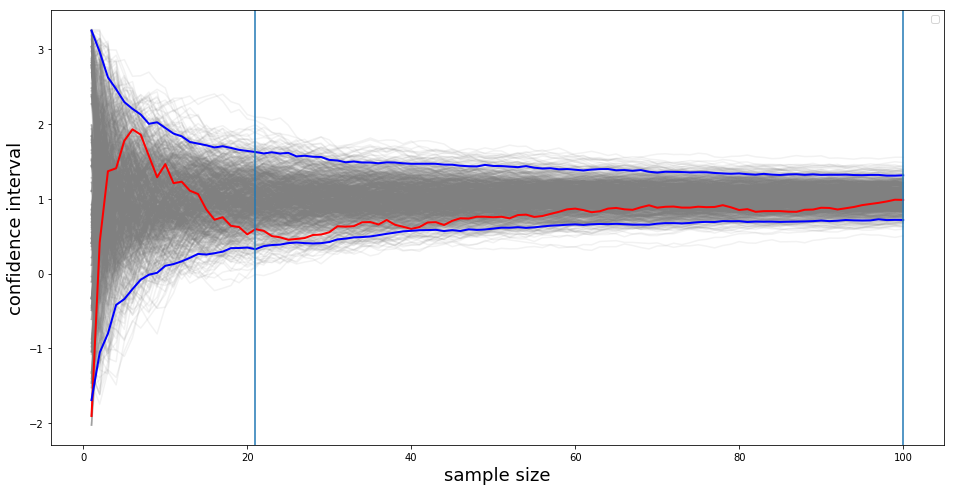

In [30]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x**2)/x

# data sample for integration
n = 100
x = f(np.random.random(n))

# bootstrap MC integration
B = 1000
xb = np.random.choice(x, (n, B), replace=True)
yb = 1./np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)


plt.figure(figsize = (16, 8))
plt.xlabel('sample size', fontsize=18)
plt.ylabel('confidence interval', fontsize=18)
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.1)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=2)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b', linewidth=2);
plt.axvline(21, 0, 1)
plt.axvline(100, 0, 1)
plt.legend()
plt.show()

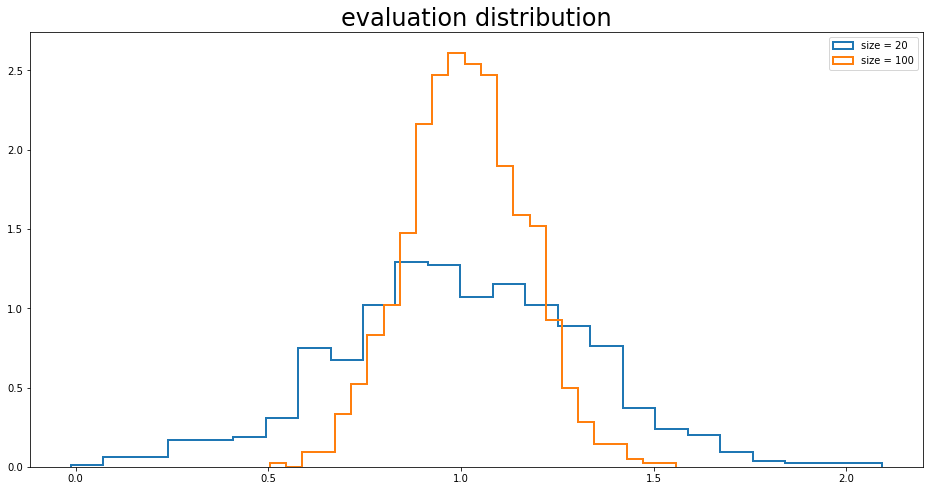

In [31]:
plt.figure(figsize = (16, 8))
plt.title('evaluation distribution', fontsize=24)
plt.hist(yb[20, :], 25, histtype='step', normed=True, linewidth=2, label='size = 20')
plt.hist(yb[99, :], 25, histtype='step', normed=True, linewidth=2, label='size = 100')
plt.legend()
plt.show()

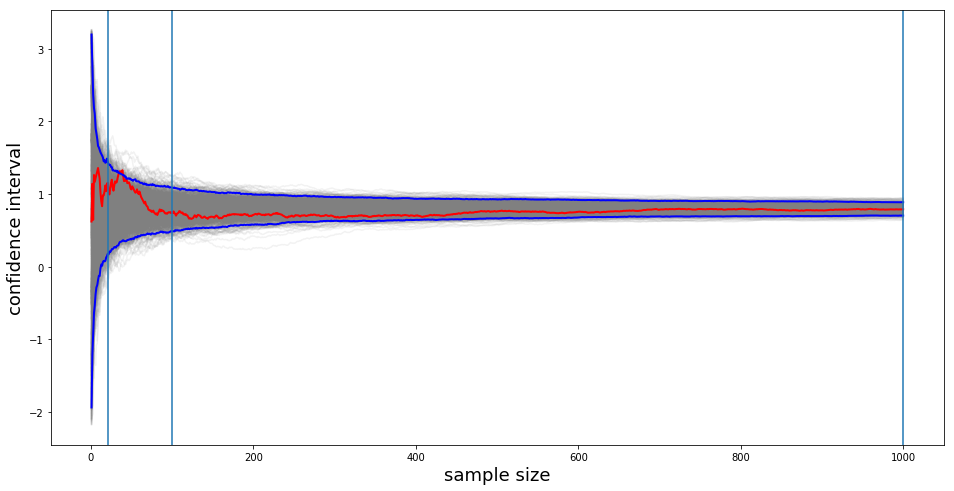

In [32]:
# data sample for integration
n = 1000
x = f(np.random.random(n))

# bootstrap MC integration
B = 1000
xb = np.random.choice(x, (n, B), replace=True)
yb = 1./np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)


plt.figure(figsize = (16, 8))
plt.xlabel('sample size', fontsize=18)
plt.ylabel('confidence interval', fontsize=18)
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.1)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=2)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b', linewidth=2);
plt.axvline(21, 0, 1)
plt.axvline(100, 0, 1)
plt.axvline(1000, 0, 1)
plt.show()

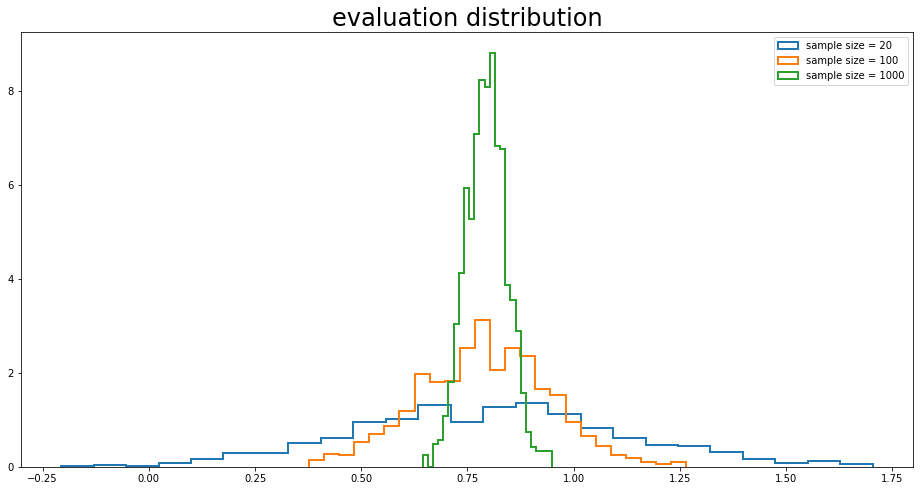

In [33]:
plt.figure(figsize = (16, 8))
plt.title('evaluation distribution', fontsize=24)
plt.hist(yb[20, :], 25, histtype='step', normed=True, linewidth=2, label='sample size = 20')
plt.hist(yb[99, :], 25, histtype='step', normed=True, linewidth=2, label='sample size = 100')
plt.hist(yb[999, :], 25, histtype='step', normed=True, linewidth=2, label='sample size = 1000')
plt.legend()
plt.show()

## Bootstrap Example 3.

In [23]:
np.random.seed(23)
N, theta = 100, 1
data = np.random.uniform(0, theta, N)
theta_hat = np.max(data)
theta_hat

0.9784269160148309

### Maximum Likelihood Estimation

Итак, у нас есть выборка от равномерного распределения $\mathcal{U}[0, \theta]$. Довольно просто показывается, что 
$$
\hat{\theta}_{\text{MLE}} = \hat{\theta} = \max\{X_1, \dots, X_n \},
$$
для заданной выборки $\mathcal{X} = \{ X_1, \dots, X_n \}$.

Что мы можем сказать про $\hat{\theta}$, точнее про распределние?

$$
F_{\hat{\theta}}(x) = \mathbb{P}(\hat{\theta} \le x) = \mathbb{P} (\max\{X_1, \dots, X_n \} \le x) \stackrel{\text{i.i.d.}}{=} \prod_{i=1}^N \mathbb{P} (X_i \le x) = \left(\frac{x}{\theta}\right)^N. 
$$

Из функции распределения можно легко получить плотность распределения случайной величины $\hat{\theta}$:
$$
f_{\hat{\theta}}(x) = \frac{Nx ^{N-1}}{\theta^N}, \quad \forall x \in (0, \theta).
$$

Теперь давайте сравним эту плотность с гистограммой полученной с помощью бутстрепа. 

In [24]:
B = 50

In [25]:
bootstrap_data = np.random.choice(data, size = (N, B), replace=True)
theta_b = np.max(bootstrap_data, axis=0)
theta_b_hat = theta_b.mean()

In [26]:
import seaborn as sns

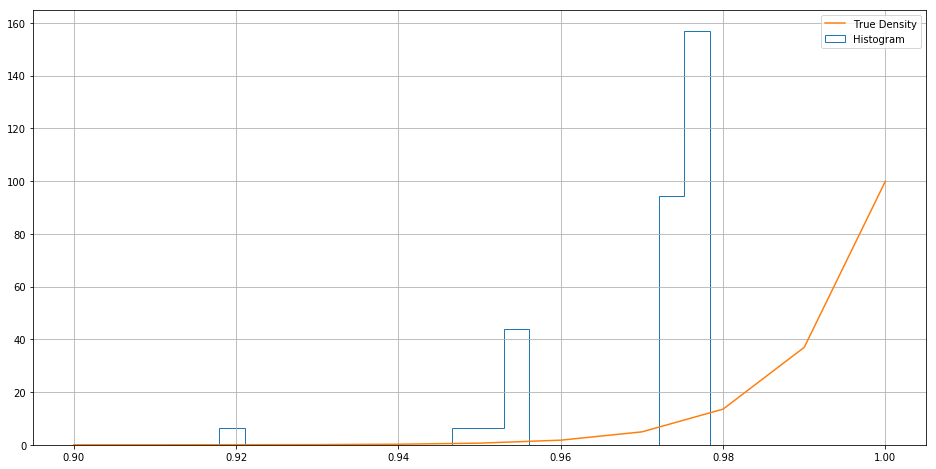

In [27]:
plt.figure(figsize = (16, 8))
# sns.distplot(theta_b, label = "Histogram", norm_hist=True)
plt.hist(theta_b, bins = 'auto', label = "Histogram", histtype='step', normed=True)
x = np.arange(0.9, 1.01, 0.01)
plt.plot(x , N * x ** (N - 1), label = "True Density")

plt.legend(loc='best')

plt.grid()

In [28]:
print("Bootstrap theta: ", theta_b_hat, "MLE theta: ", theta_hat, "True theta: ", theta)

('Bootstrap theta: ', 0.9711022932781098, 'MLE theta: ', 0.9784269160148309, 'True theta: ', 1)


Напоминание:
$$
\mathbb{P}(X_{(n)} \le x) = \left(\dfrac{x}{\theta}\right)^n
$$
Оценим следующее распределение:

$$\
\mathbb{P}(n(\theta - X_{(n)}) \le x) =
1 - \mathbb{P}(n(\theta - X_{(n)}) > x) = \\
1 - \mathbb{P}\left(X_{(n)} < \theta - \dfrac{x}{n}\right) =
1 - \left(1 - \frac{x}{\theta n}\right)^n \rightarrow 1 - e^{-x/\theta}
$$
иначе говоря, сходится к экспоненциальной случайной величине со средним $\theta$.

Рассмотрим bootstrap оценку распределения $n(\theta - X_{(n)})$ по обычной схеме(переход в пространство bootstrap):

$n(X_{(n)} - X_{(n)}^b)$

Очевидно, что $\mathbb{P}(X_{(n)} = X_{(n)}^b) = 1 - (1-\frac{1}{n})^n \rightarrow 1 - e^{-1}$

поэтому bootstrap распределение имеет дискретный носитель в нуле даже асимптотически, несмотря на то, что фактическое предельное распределение является непрерывным.

Таким образом, хотя истинное предельное распределение экспоненциальное, предельное распределение бутстрапа помещает дискретный носитель в нуль с массой $1-e^{-1} \approx 0,6321$ независимо от фактического значения $\theta$. Выбирая $\theta$ достаточно большим, мы можем сделать вероятность истинного предельного распределения произвольным малым в любом фиксированном интервале $[0, \delta]$, но бутстреп будет всё ещё сообщать, что в этом интервале есть как минимум вероятность $0.6321$